In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
from IPython.display import display

In [2]:
df = pd.read_csv("netflix_titles.csv" )

In [3]:
# FEATURE ENGINEERING
from dateutil.parser import parse

def safe_parse_date(x):
    try:
        return parse(x)
    except:
        return pd.NaT

df['date_added'] = df['date_added'].apply(safe_parse_date)
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(',')))
df['num_cast'] = df['cast'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

In [4]:
def extract_duration(x):
    if pd.isnull(x):
        return None
    num = x.split()[0]
    try:
        return int(num)
    except:
        return None

df['duration_int'] = df['duration'].apply(extract_duration)
df['duration_type'] = df['duration'].apply(lambda x: x.split()[1] if pd.notnull(x) else None)

In [5]:
selected_cols = ['title', 'type', 'release_year', 'date_added', 'rating', 'duration', 'duration_int', 'duration_type', 'listed_in', 'num_genres', 'num_cast']
display(df[selected_cols].head(10).style.set_table_attributes('style="display:inline"').set_caption("Tabel Sampel Data Netflix"))

,title,type,release_year,date_added,rating,duration,duration_int,duration_type,listed_in,num_genres,num_cast
0,Dick Johnson Is Dead,Movie,2020,2021-09-25 00:00:00,PG-13,90 min,90.000000,min,Documentaries,1,0
1,Blood & Water,TV Show,2021,2021-09-24 00:00:00,TV-MA,2 Seasons,2.000000,Seasons,"International TV Shows, TV Dramas, TV Mysteries",3,19
2,Ganglands,TV Show,2021,2021-09-24 00:00:00,TV-MA,1 Season,1.000000,Season,"Crime TV Shows, International TV Shows, TV Action & Adventure",3,9
3,Jailbirds New Orleans,TV Show,2021,2021-09-24 00:00:00,TV-MA,1 Season,1.000000,Season,"Docuseries, Reality TV",2,0
4,Kota Factory,TV Show,2021,2021-09-24 00:00:00,TV-MA,2 Seasons,2.000000,Seasons,"International TV Shows, Romantic TV Shows, TV Comedies",3,8
5,Midnight Mass,TV Show,2021,2021-09-24 00:00:00,TV-MA,1 Season,1.000000,Season,"TV Dramas, TV Horror, TV Mysteries",3,16
6,My Little Pony: A New Generation,Movie,2021,2021-09-24 00:00:00,PG,91 min,91.000000,min,Children & Family Movies,1,10
7,Sankofa,Movie,1993,2021-09-24 00:00:00,TV-MA,125 min,125.000000,min,"Dramas, Independent Movies, International Movies",3,8
8,The Great British Baking Show,TV Show,2021,2021-09-24 00:00:00,TV-14,9 Seasons,9.000000,Seasons,"British TV Shows, Reality TV",2,4
9,The Starling,Movie,2021,2021-09-24 00:00:00,PG-13,104 min,104.000000,min,"Comedies, Dramas",2,11


C:\Users\bimod\AppData\Local\Temp\ipykernel_11920\2659887235.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


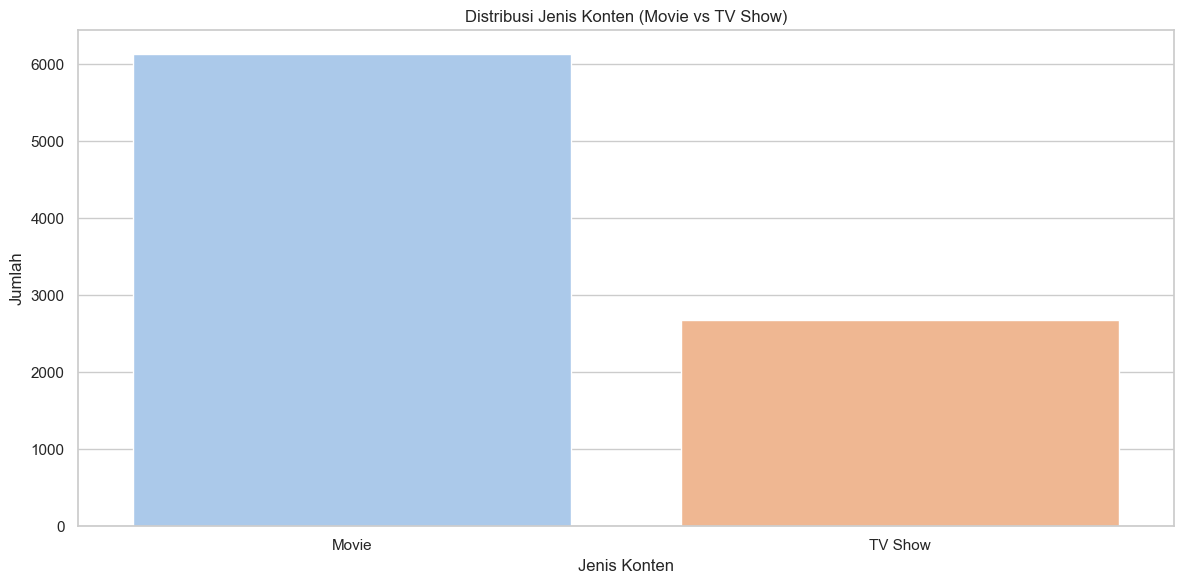

In [6]:
# EDA DAN DATA VISUALIZATION

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 1. Distribusi Jenis Konten (Movie vs TV Show)
plt.figure()
sns.countplot(data=df, x='type', palette='pastel')
plt.title("Distribusi Jenis Konten (Movie vs TV Show)")
plt.xlabel("Jenis Konten")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()
plt.show()

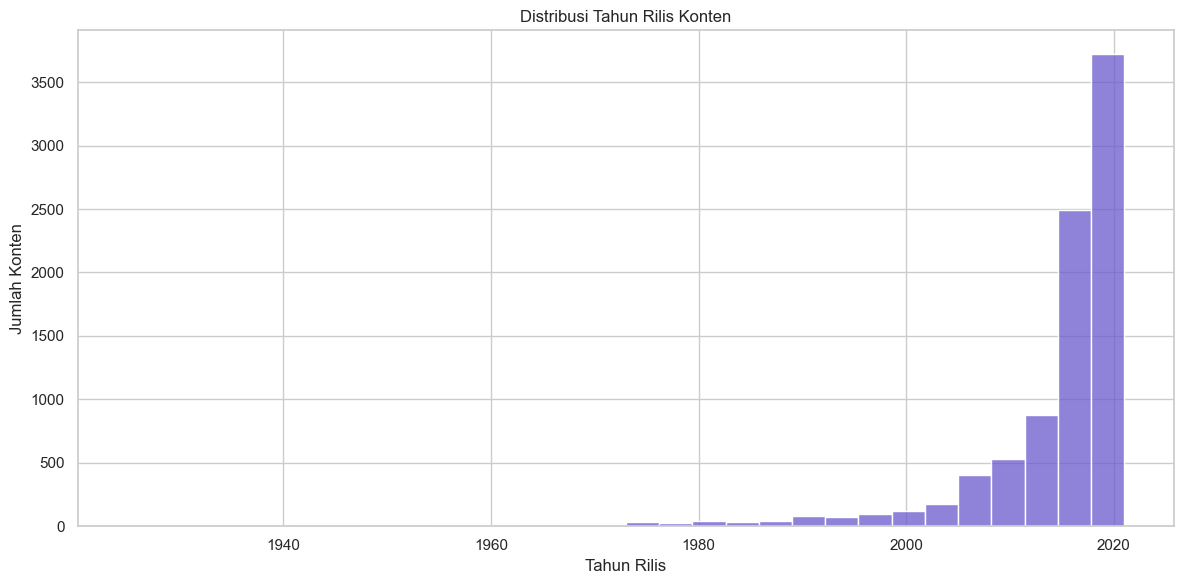

In [7]:
# 2. Jumlah Konten Dirilis per Tahun
plt.figure()
sns.histplot(data=df, x='release_year', bins=30, kde=False, color='slateblue')
plt.title("Distribusi Tahun Rilis Konten")
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Konten")
plt.tight_layout()
plt.show()

C:\Users\bimod\AppData\Local\Temp\ipykernel_11920\3143232221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


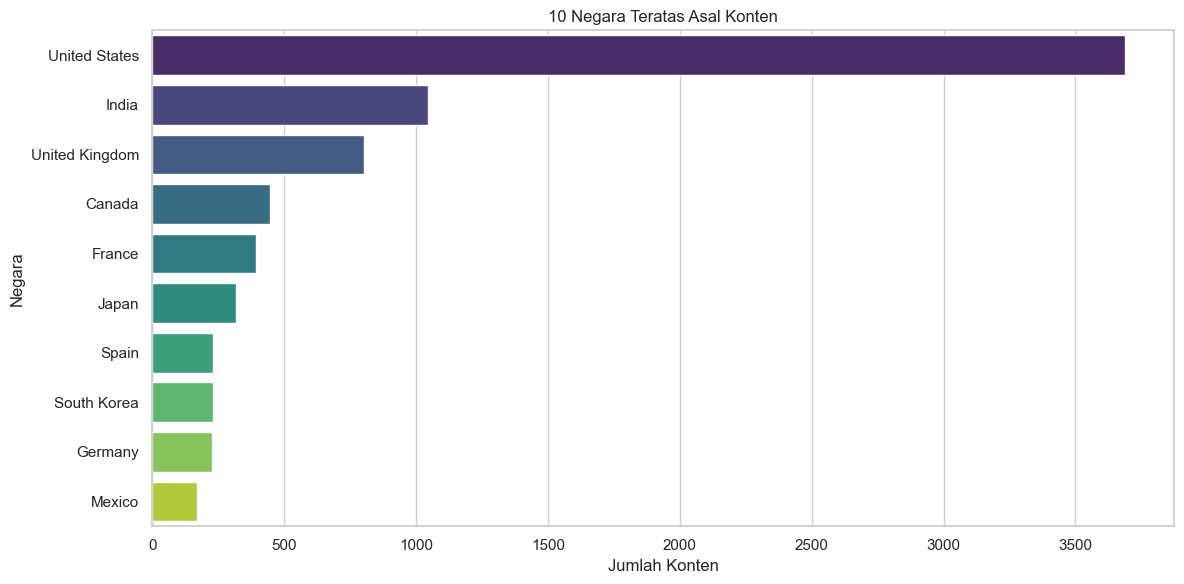

In [8]:
# 3. Negara Asal Konten Teratas
top_countries = df['country'].dropna().str.split(', ').explode().value_counts().head(10)
plt.figure()
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("10 Negara Teratas Asal Konten")
plt.xlabel("Jumlah Konten")
plt.ylabel("Negara")
plt.tight_layout()
plt.show()

C:\Users\bimod\AppData\Local\Temp\ipykernel_23556\1540485177.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='plasma')


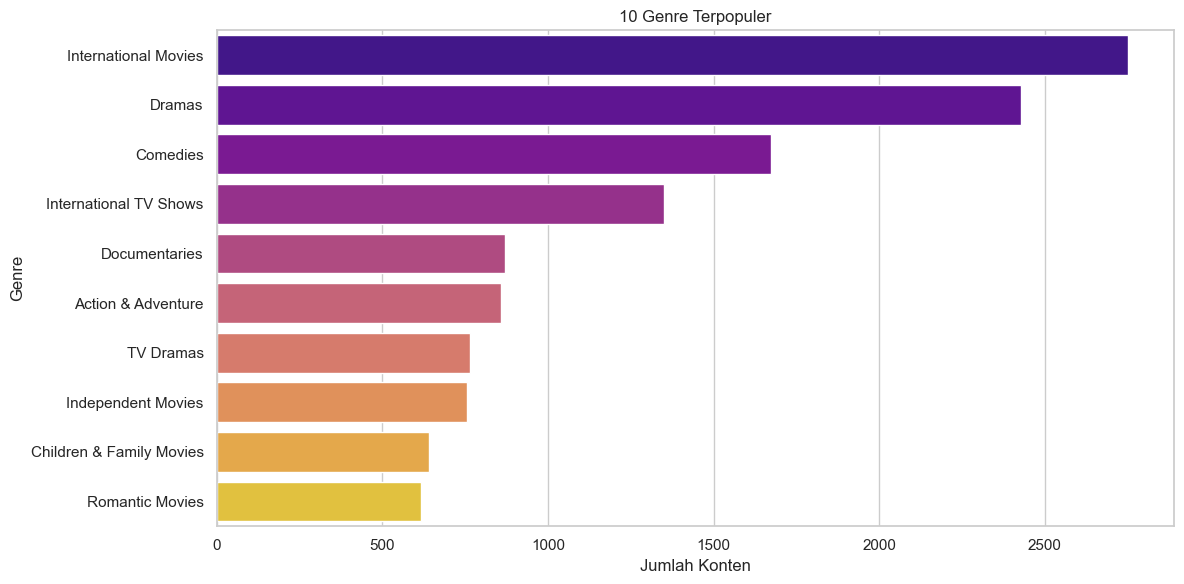

In [24]:
# 4. Genre Terpopuler
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
plt.figure()
sns.barplot(x=top_genres.values, y=top_genres.index, palette='plasma')
plt.title("10 Genre Terpopuler")
plt.xlabel("Jumlah Konten")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

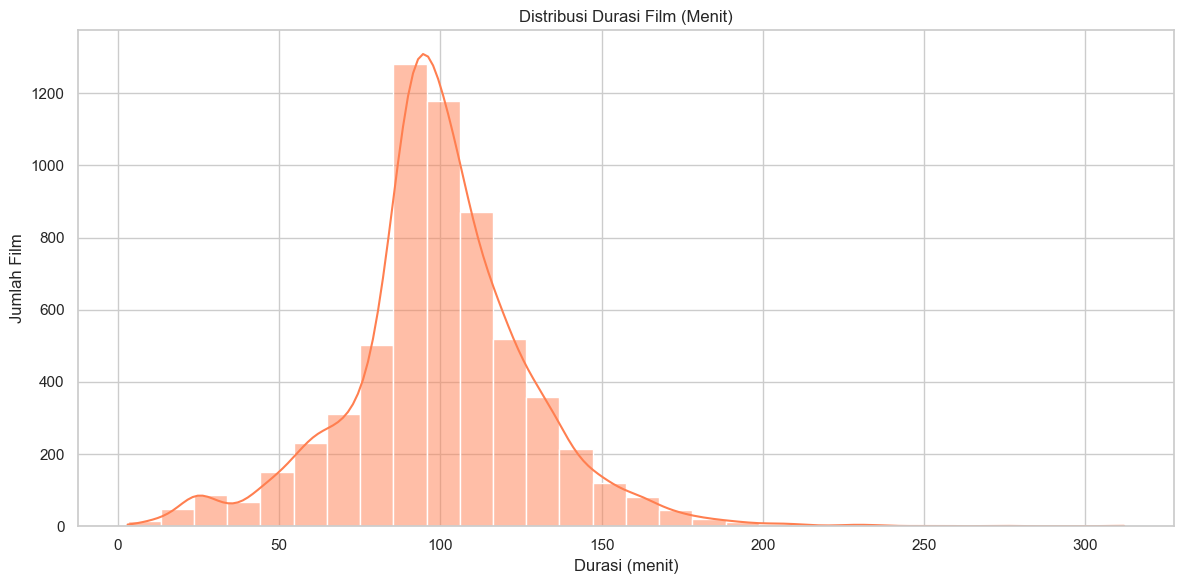

In [25]:
# 5. Distribusi Durasi untuk Movie
plt.figure()
movie_durations = df[df['type'] == 'Movie']['duration_int'].dropna()
sns.histplot(movie_durations, bins=30, kde=True, color='coral')
plt.title("Distribusi Durasi Film (Menit)")
plt.xlabel("Durasi (menit)")
plt.ylabel("Jumlah Film")
plt.tight_layout()
plt.show()

C:\Users\bimod\AppData\Local\Temp\ipykernel_23556\1150751293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='cool')


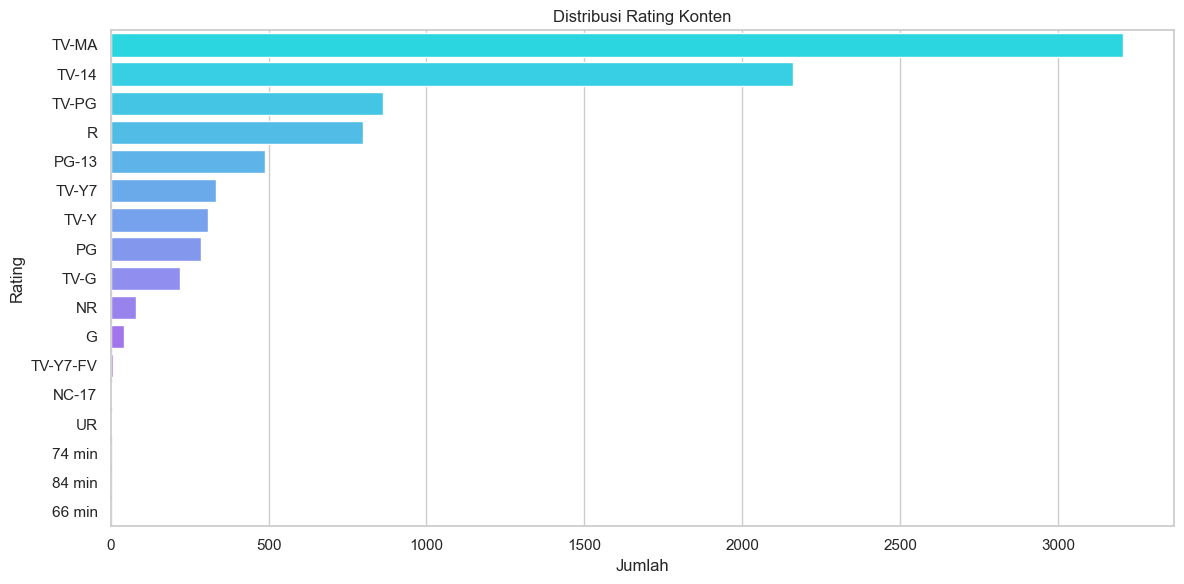

In [26]:
# 6. Distribusi Rating
plt.figure()
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='cool')
plt.title("Distribusi Rating Konten")
plt.xlabel("Jumlah")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


## 📈 Statistik Deskriptif

Statistik deskriptif memberikan gambaran umum tentang distribusi data, seperti:

- **Mean (rata-rata):**

$$
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

- **Standard Deviation (simpangan baku):**

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
$$

- **Min, Max, dan Kuartil** 
    

In [9]:

# Statistik deskriptif untuk fitur numerik
df.describe()
    

,date_added,release_year,year_added,num_genres,num_cast,duration_int
count,8797,8807.000000,8797.000000,8807.000000,8807.000000,8804.000000
mean,2019-05-17 05:59:08.436967168,2014.180198,2018.871888,2.194050,7.281254,69.846888
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000,0.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,2.000000,4.000000,2.000000
50%,2019-07-02 00:00:00,2017.000000,2019.000000,2.000000,8.000000,88.000000
75%,2020-08-19 00:00:00,2019.000000,2020.000000,3.000000,10.000000,106.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,3.000000,50.000000,312.000000
std,NaN,8.819312,1.574243,0.784341,4.862244,50.814828



## 📊 Korelasi Antar Fitur

Korelasi Pearson mengukur hubungan linear antar fitur:

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

Nilai \( r \) antara -1 dan 1:
- \( r > 0 \): hubungan positif
- \( r < 0 \): hubungan negatif
- \( r = 0 \): tidak ada hubungan linear
    

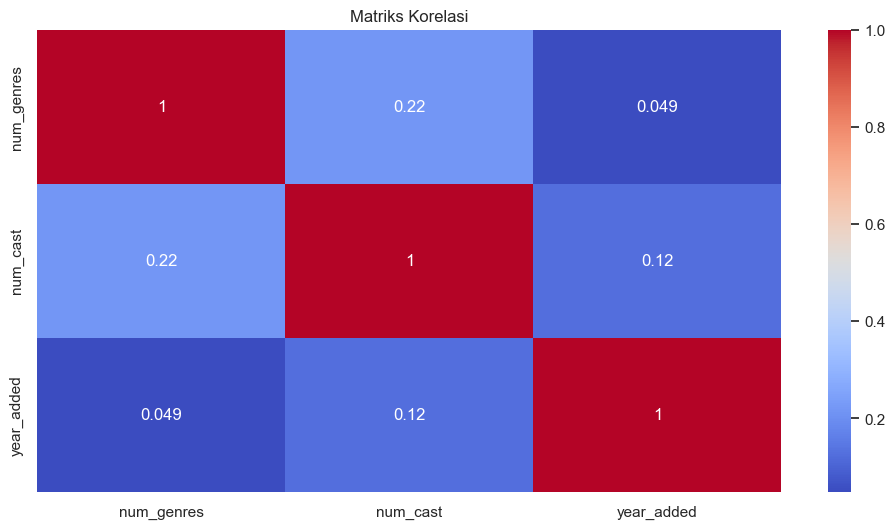

In [10]:

# Matriks korelasi
correlation_matrix = df[['num_genres', 'num_cast', 'year_added']].corr()

# Visualisasi korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()
    


## 🔄 Normalisasi Min-Max

Normalisasi skala data agar berada di antara 0 dan 1 menggunakan rumus:

$$
x' = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

Digunakan untuk menyamakan skala antar fitur.
    

In [11]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['num_genres_norm', 'num_cast_norm']] = scaler.fit_transform(df[['num_genres', 'num_cast']])
df[['num_genres_norm', 'num_cast_norm']].head()
    

,num_genres_norm,num_cast_norm
0,0.0,0.00
1,1.0,0.38
2,1.0,0.18
3,0.5,0.00
4,1.0,0.16
